# Carry Tables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import random
import fn
import math
import pickle
from tqdm.notebook import tqdm_notebook

/Users/cutterdawes/Desktop/Princeton/Thesis/Repo/fn.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext autoreload
%autoreload 2

## Display Carry Tables

In [3]:
b=4 #modulus

basic_table=1*(np.add.outer(np.arange(b),np.arange(b))>=b)
alt_table=np.array([[0,0,0,0],
                    [0,3,3,3],
                    [0,3,3,0],
                    [0,3,0,0]])

### Basic Table, depth $\in [1:3]$

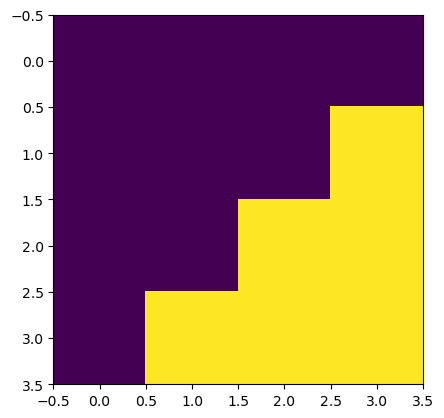

In [172]:
plt.imshow(fn.construct_product_table(basic_table, 1))

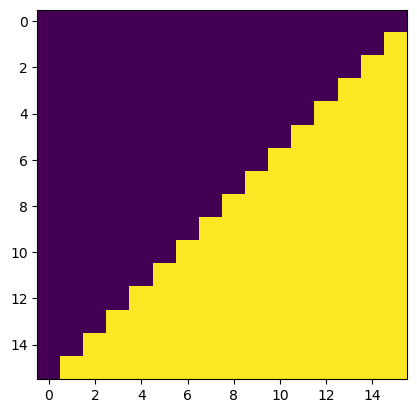

In [174]:
plt.imshow(fn.construct_product_table(basic_table, 2))

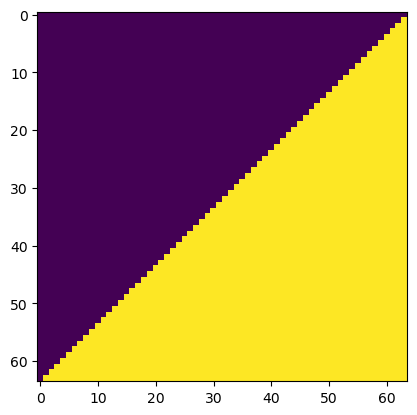

In [175]:
plt.imshow(fn.construct_product_table(basic_table, 3))

### Alternative Table, depth $\in [1:4]$

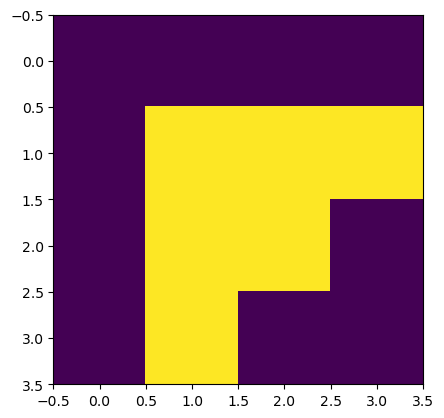

In [176]:
plt.imshow(fn.construct_product_table(alt_table, 1))

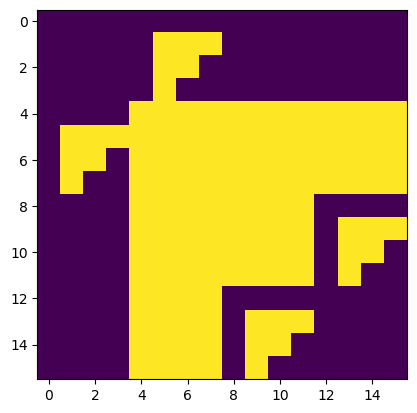

In [177]:
plt.imshow(fn.construct_product_table(alt_table, 2))

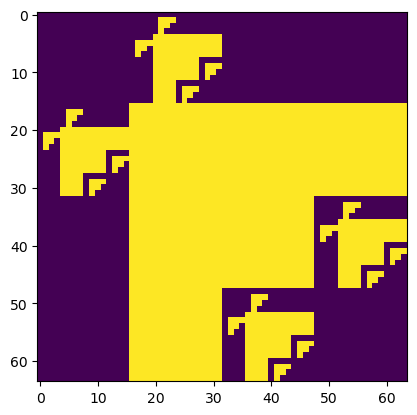

In [178]:
plt.imshow(fn.construct_product_table(alt_table, 3))

## Compare Carry Tables

### Find alternative cocycles

In [4]:
with open('pickles/all_tables.pickle', 'rb') as f:
    all_tables = pickle.load(f)

### Plot their carry tables

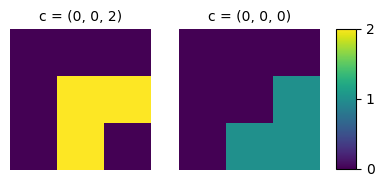

In [5]:
fn.show_tables(all_tables[3], 3, depth=1)

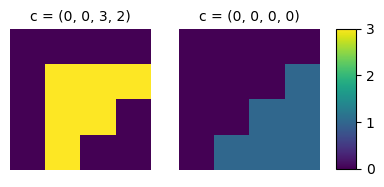

In [6]:
fn.show_tables(all_tables[4], 4, depth=1)

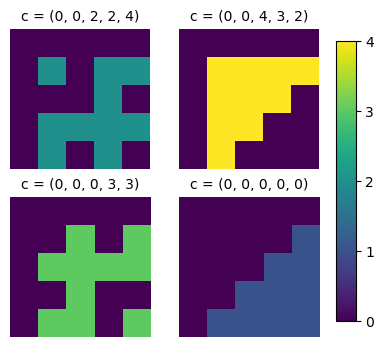

In [7]:
fn.show_tables(all_tables[5], 5, depth=1)

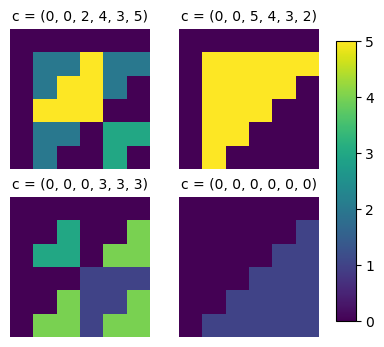

In [8]:
fn.show_tables(all_tables[6], 6, depth=1)

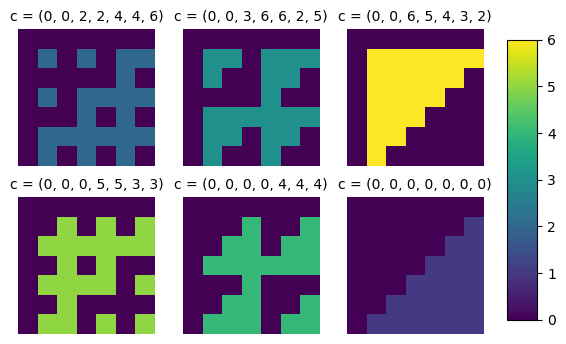

In [9]:
fn.show_tables(all_tables[7], 7, depth=1)

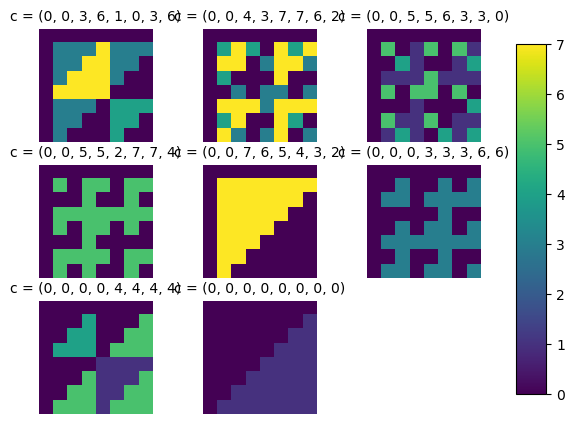

In [10]:
fn.show_tables(all_tables[8], 8, depth=1)

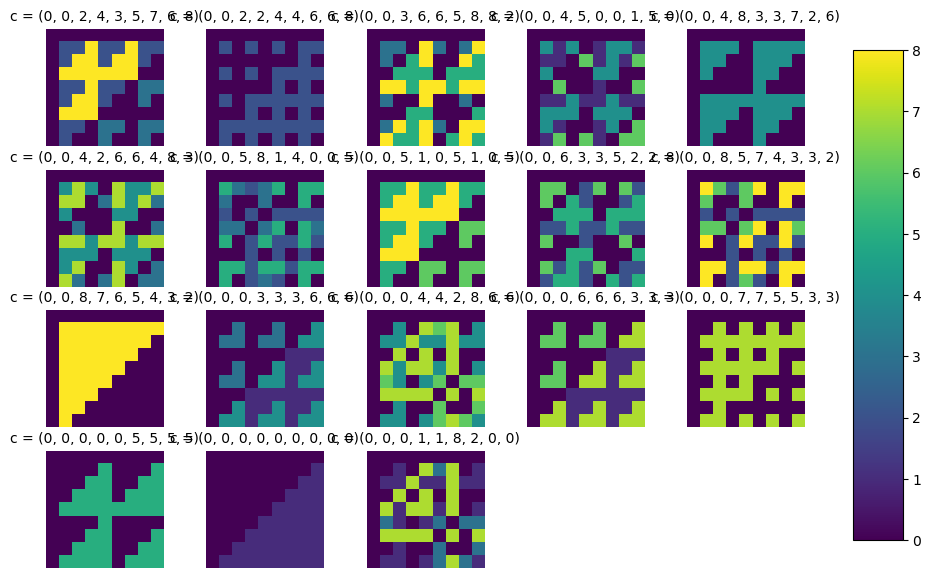

In [11]:
fn.show_tables(all_tables[9], 9, depth=1)

### Compute fraction of zeros, number of unique digits, and estimated box-counting dimension for each table

In [12]:
with open('pickles/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [13]:
with open('pickles/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

In [14]:
with open('pickles/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

### Plot fraction of zeros, number of unique digits, and estimated box-counting dimension

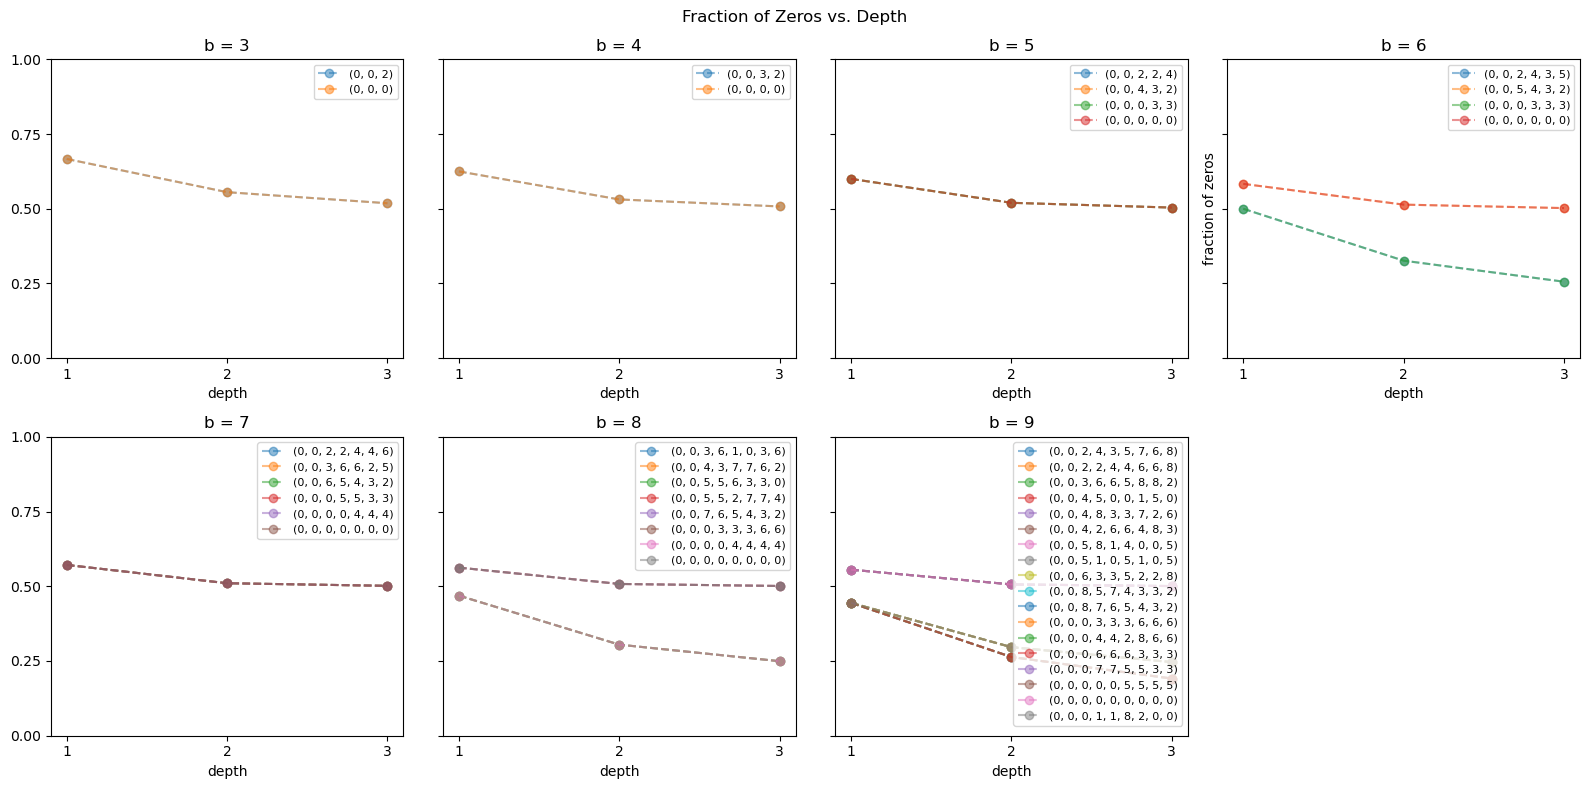

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(frac_zeros_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2], [1, 2, 3])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 1, 5))
        if (i == 3) or (i == 7):
            ax.set_ylabel('fraction of zeros')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=8)
axes[7].axis('off')
fig.suptitle('Fraction of Zeros vs. Depth')
plt.tight_layout()

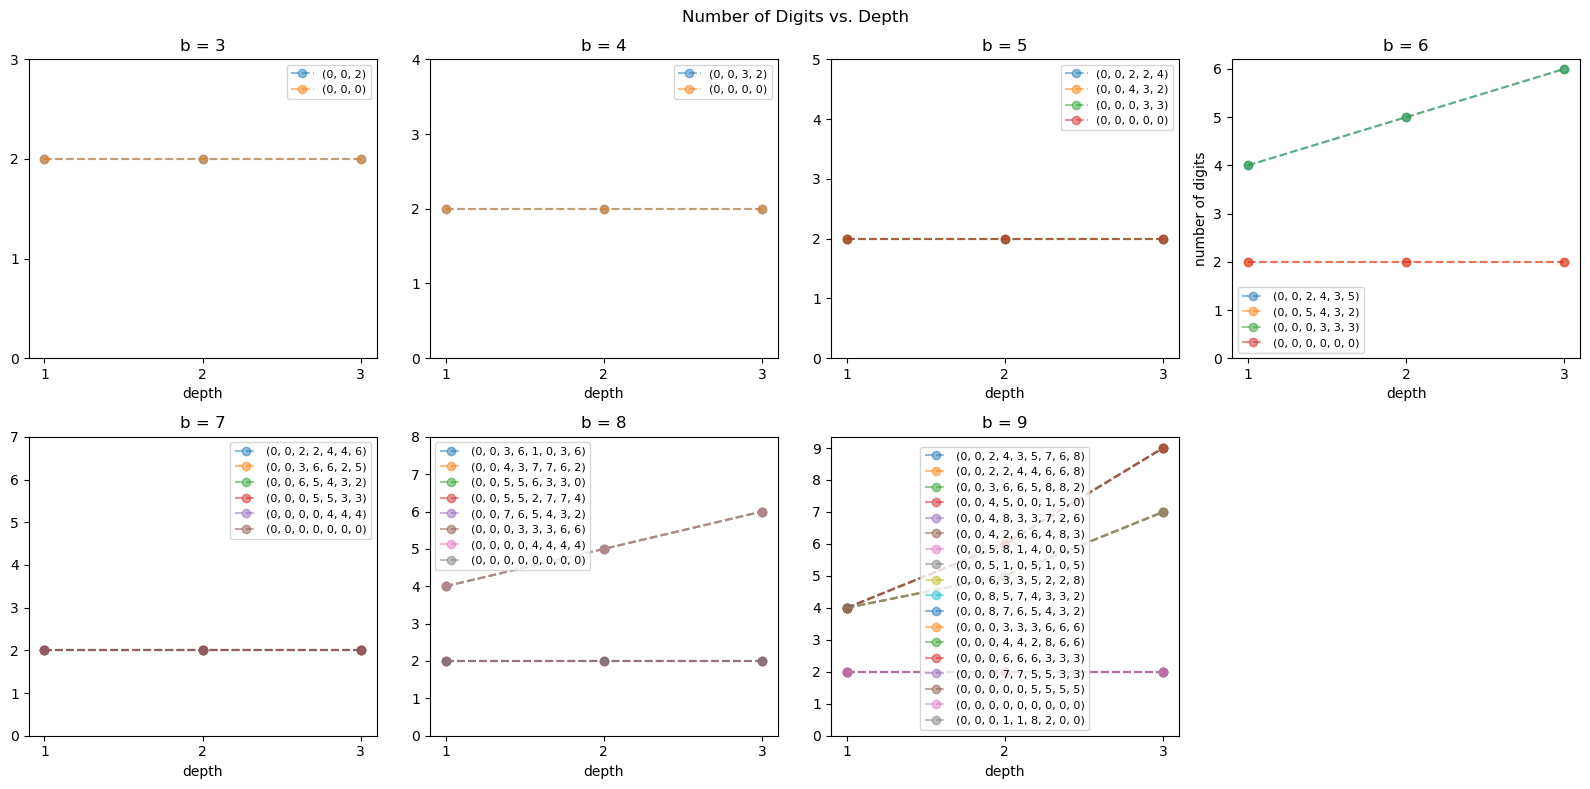

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(num_digits_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2], [1, 2, 3])
        ax.set_yticks(range(i+4))
        ax.set_xlabel('depth')
        if (i == 3) or (i == 7):
            ax.set_ylabel('number of digits')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=8)
axes[7].axis('off')
fig.suptitle('Number of Digits vs. Depth')
plt.tight_layout()

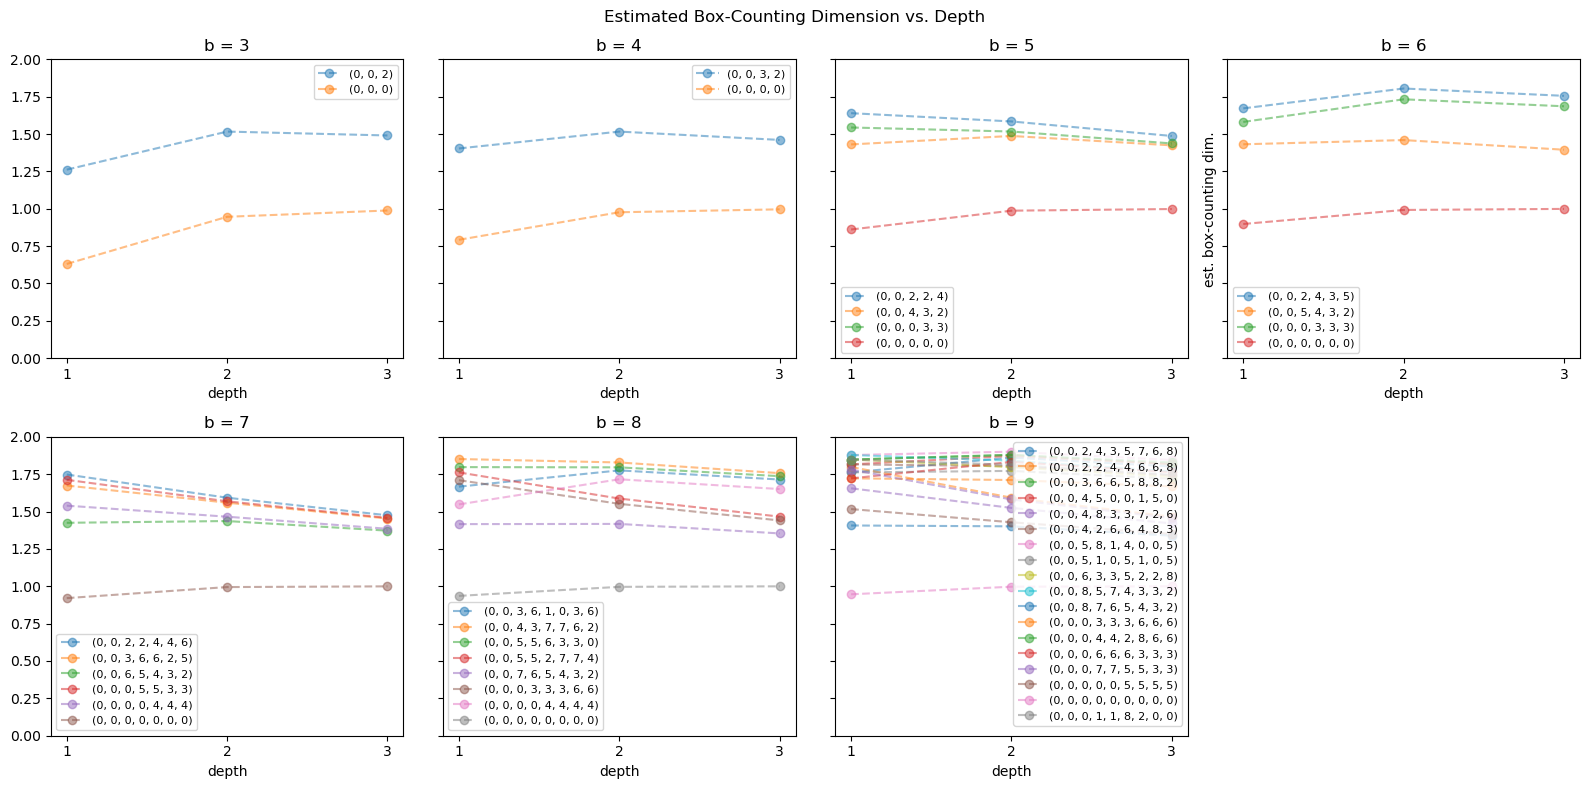

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(est_dim_box_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2], [1, 2, 3])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
        if (i == 3) or (i == 7):
            ax.set_ylabel('est. box-counting dim.')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=8)
axes[7].axis('off')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()

### Check that recursive tables are still cocycles

In [18]:
bases = list(all_tables.keys())
for b in tqdm_notebook(bases):
    for c in all_tables[b].keys():
        table = all_tables[b][c]
        for depth in range(1, 3):
            if (fn.assert_cocycle(table, depth=depth) == False):
                print(b, c, depth)

  0%|          | 0/7 [00:00<?, ?it/s]

### Derive Standard Carry Table

In [40]:
def derive_standard_carry(b):
    f = np.empty((b, b))
    for n in range(b):
        for m in range(b):
            f[n, m] = (n + m - (n+m)%b) % (b**2) / b
    print(f)

In [41]:
derive_standard_carry(6)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1.]]


### Find All Cross-Sections Corresponding to each Carry Table

### Check how the recursive tables compare in terms of isomorphisms of groups

In [42]:
def generate_cycle(b, c, step):
    depth = len(step)
    place = fn.RecursiveGrpElt((0, 0), all_tables[b][c])
    step = fn.RecursiveGrpElt(step, all_tables[b][c])
    cycle = [place.vals]
    for t in range(b**depth):
        place += step
        cycle.append(place.vals)
    cycle = [place[-depth:] for place in cycle]
    return cycle

In [47]:
b = 6
c = ((0, 0, 0, 0, 0, 0), (0, 1, 2, 3, 4, 5), (0, 2, 4, 0, 2, 4), (0, 3, 0, 3, 0, 3), (0, 4, 2, 0, 4, 2), (0, 5, 4, 3, 2, 1))
step = (0, 1)
normal = generate_cycle(b, c, step)

In [52]:
c = ((0, 0, 2, 4, 3, 5), (0, 1, 4, 1, 1, 4), (0, 2, 0, 4, 5, 3), (0, 3, 2, 1, 3, 2), (0, 4, 4, 4, 1, 1), (0, 5, 0, 1, 5, 0))
for step in range(1, b):
    step = (0, step)
    cycle = generate_cycle(b, c, step)
    print(cycle)
    print()

[(0, 0), (0, 1), (2, 2), (4, 3), (3, 4), (5, 5), (1, 0), (1, 1), (3, 2), (5, 3), (4, 4), (0, 5), (2, 0), (2, 1), (4, 2), (0, 3), (5, 4), (1, 5), (3, 0), (3, 1), (5, 2), (1, 3), (0, 4), (2, 5), (4, 0), (4, 1), (0, 2), (2, 3), (1, 4), (3, 5), (5, 0), (5, 1), (1, 2), (3, 3), (2, 4), (4, 5), (0, 0)]

[(0, 0), (0, 2), (5, 4), (1, 0), (1, 2), (0, 4), (2, 0), (2, 2), (1, 4), (3, 0), (3, 2), (2, 4), (4, 0), (4, 2), (3, 4), (5, 0), (5, 2), (4, 4), (0, 0), (0, 2), (5, 4), (1, 0), (1, 2), (0, 4), (2, 0), (2, 2), (1, 4), (3, 0), (3, 2), (2, 4), (4, 0), (4, 2), (3, 4), (5, 0), (5, 2), (4, 4), (0, 0)]

[(0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0)]

[(0, 0), (0, 4), (3, 2), (5, 0), (5, 4), (2, 2), (4, 0), (4, 4), (1, 2), (3, 0), (3, 4), (0, 2), (2, 0), (

In [9]:
b = 8
for c in all_tables[b].keys():
    print('c =', c, '\n')
    print(all_tables[b][c], '\n')
    for step in product(*[range(b)]*2):
        cycle = generate_cycle(b, c, step)
        if ([n[0] for n in cycle][:b] == [0]*b) and (step != (0, 0)):
            print('step =', step)
            print(cycle)
    print('\n', '--------------------------------', '\n')

c = ((0, 0, 3, 6, 1, 0, 3, 6), (0, 1, 5, 1, 5, 5, 1, 5), (0, 2, 7, 4, 1, 2, 7, 4), (0, 3, 1, 7, 5, 7, 5, 3), (0, 4, 3, 2, 1, 4, 3, 2), (0, 5, 5, 5, 5, 1, 1, 1), (0, 6, 7, 0, 1, 6, 7, 0), (0, 7, 1, 3, 5, 3, 5, 7)) 

[[0 0 0 0 0 0 0 0]
 [0 3 3 3 7 3 3 3]
 [0 3 3 7 7 3 3 0]
 [0 3 7 7 7 3 0 0]
 [0 7 7 7 7 0 0 0]
 [0 3 3 3 0 4 4 4]
 [0 3 3 0 0 4 4 0]
 [0 3 0 0 0 4 0 0]] 


 -------------------------------- 

c = ((0, 0, 4, 3, 7, 7, 6, 2), (0, 1, 6, 6, 3, 4, 4, 1), (0, 2, 0, 1, 7, 1, 2, 0), (0, 3, 2, 4, 3, 6, 0, 7), (0, 4, 4, 7, 7, 3, 6, 6), (0, 5, 6, 2, 3, 0, 4, 5), (0, 6, 0, 5, 7, 5, 2, 4), (0, 7, 2, 0, 3, 2, 0, 3)) 

[[0 0 0 0 0 0 0 0]
 [0 4 7 4 0 7 4 7]
 [0 7 7 0 3 7 7 3]
 [0 4 0 0 0 7 0 0]
 [0 0 3 0 3 3 0 3]
 [0 7 7 7 3 7 7 7]
 [0 4 7 0 0 7 4 0]
 [0 7 3 0 3 7 0 3]] 


 -------------------------------- 

c = ((0, 0, 5, 5, 6, 3, 3, 0), (0, 1, 7, 0, 2, 0, 1, 7), (0, 2, 1, 3, 6, 5, 7, 6), (0, 3, 3, 6, 2, 2, 5, 5), (0, 4, 5, 1, 6, 7, 3, 4), (0, 5, 7, 4, 2, 4, 1, 3), (0, 6, 1, 7, 6, 1, 7, 2),

In [13]:
for c_class in all_tables[b].keys():
    dc_class = {}
    for c in c_class:
        dc = []
        for i in range(b):
            for j in range(b):
                dc.append((c[(i+j)%b] - c[i] - c[j]) % b)
        if dc not in dc_class.values():
            dc_class[c] = dc
    print(c_class)
    print(len(dc_class))
    print()

((0, 0, 3, 6, 1, 0, 3, 6), (0, 1, 5, 1, 5, 5, 1, 5), (0, 2, 7, 4, 1, 2, 7, 4), (0, 3, 1, 7, 5, 7, 5, 3), (0, 4, 3, 2, 1, 4, 3, 2), (0, 5, 5, 5, 5, 1, 1, 1), (0, 6, 7, 0, 1, 6, 7, 0), (0, 7, 1, 3, 5, 3, 5, 7))
1

((0, 0, 4, 3, 7, 7, 6, 2), (0, 1, 6, 6, 3, 4, 4, 1), (0, 2, 0, 1, 7, 1, 2, 0), (0, 3, 2, 4, 3, 6, 0, 7), (0, 4, 4, 7, 7, 3, 6, 6), (0, 5, 6, 2, 3, 0, 4, 5), (0, 6, 0, 5, 7, 5, 2, 4), (0, 7, 2, 0, 3, 2, 0, 3))
1

((0, 0, 5, 5, 6, 3, 3, 0), (0, 1, 7, 0, 2, 0, 1, 7), (0, 2, 1, 3, 6, 5, 7, 6), (0, 3, 3, 6, 2, 2, 5, 5), (0, 4, 5, 1, 6, 7, 3, 4), (0, 5, 7, 4, 2, 4, 1, 3), (0, 6, 1, 7, 6, 1, 7, 2), (0, 7, 3, 2, 2, 6, 5, 1))
1

((0, 0, 5, 5, 2, 7, 7, 4), (0, 1, 7, 0, 6, 4, 5, 3), (0, 2, 1, 3, 2, 1, 3, 2), (0, 3, 3, 6, 6, 6, 1, 1), (0, 4, 5, 1, 2, 3, 7, 0), (0, 5, 7, 4, 6, 0, 5, 7), (0, 6, 1, 7, 2, 5, 3, 6), (0, 7, 3, 2, 6, 2, 1, 5))
1

((0, 0, 7, 6, 5, 4, 3, 2), (0, 1, 1, 1, 1, 1, 1, 1), (0, 2, 3, 4, 5, 6, 7, 0), (0, 3, 5, 7, 1, 3, 5, 7), (0, 4, 7, 2, 5, 0, 3, 6), (0, 5, 1, 5, 1, 5, 1,

In [ ]:
all_tables[3].keys()